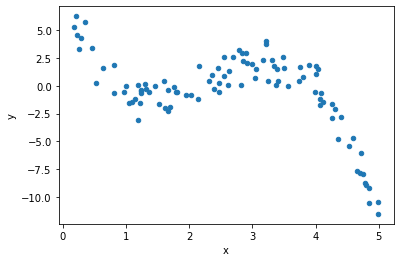

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})
df.head()

ax = df.plot.scatter(x="x", y="y")

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr)
poly_df

,0,1,2,3
0,2.462737,6.065073,14.936681,36.785116
1,4.121045,16.983015,69.987776,288.422799
2,1.957139,3.830394,7.496615,14.671921
3,4.265225,18.192144,77.593587,330.954106
4,2.137820,4.570276,9.770431,20.887426
...,...,...,...,...
95,4.773280,22.784204,108.755391,519.119959
96,3.757812,14.121147,53.064611,199.406805
97,1.667284,2.779837,4.634779,7.727495
98,4.745478,22.519557,106.866052,507.130451


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))
poly_df

,x,x^2,x^3,x^4
0,2.462737,6.065073,14.936681,36.785116
1,4.121045,16.983015,69.987776,288.422799
2,1.957139,3.830394,7.496615,14.671921
3,4.265225,18.192144,77.593587,330.954106
4,2.137820,4.570276,9.770431,20.887426
...,...,...,...,...
95,4.773280,22.784204,108.755391,519.119959
96,3.757812,14.121147,53.064611,199.406805
97,1.667284,2.779837,4.634779,7.727495
98,4.745478,22.519557,106.866052,507.130451


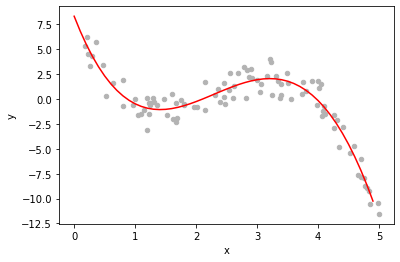

In [5]:
lr = LR()
lr.fit(poly_df, df[["y"]])
lr.coef_, lr.intercept_

ax = df.plot.scatter(x="x", y="y", color="0.7")

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")

# Part 2

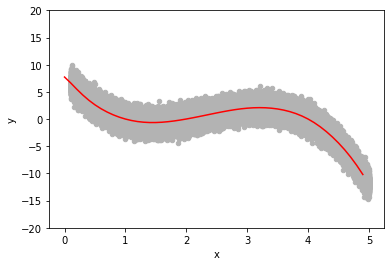

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

# random data
x = np.random.uniform(0.1, 5, 100000) # TODO: specify sample size
noise = np.random.normal(scale=1, size=x.size)
y = (4-x)*(2-x)*(1-x) + noise
df = pd.DataFrame({"y":y, "x":x})

# add columns for polynomial terms
poly = PolynomialFeatures(15, include_bias=False)
columns = ["x"]
arr = poly.fit_transform(df[columns])
poly_df = pd.DataFrame(arr, columns=poly.get_feature_names(columns))

# linear regression
lr = LR()
lr.fit(poly_df, df[["y"]])
ax = df.plot.scatter(x="x", y="y", color="0.7", ylim=(-20, 20))

# compute coords along fit line, then plot it
fit_x = np.arange(0, 5, 0.1).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))
ax.plot(fit_x, fit_y, "red")

# Part 3

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# build DataFrame of rectangle measurements

df = pd.DataFrame()
rows = 100
df["w_in"] = np.random.uniform(5,50,rows) # in inches
df["h_in"] = np.random.uniform(5,50,rows)
df["border_in"] = 2*df["w_in"] + 2*df["h_in"]
df["w_cm"] = df["w_in"] * 2.54
df["h_cm"] = df["h_in"] * 2.54
df += np.random.normal(size=(df.shape))
df.head()

,w_in,h_in,border_in,w_cm,h_cm
0,4.361074,5.307095,23.240897,11.724773,13.865461
1,26.169713,33.698578,122.397565,67.736100,87.671793
2,21.745456,18.121842,86.209308,56.018447,52.669552
3,24.945840,43.373553,133.599810,62.171394,105.812209
4,13.659834,13.996958,60.634125,39.227859,40.356770


In [12]:
corr = df.corr()
corr

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,0.102777,0.739198,0.996892,0.096059
h_in,0.102777,1.000000,0.742039,0.105283,0.996636
border_in,0.739198,0.742039,1.000000,0.742352,0.738259
w_cm,0.996892,0.105283,0.742352,1.000000,0.097692
h_cm,0.096059,0.996636,0.738259,0.097692,1.000000


([<matplotlib.axis.YTick at 0x7f471628ef98>,
 [Text(0, 0, 'w_in'),
  Text(0, 0, 'h_in'),
  Text(0, 0, 'border_in'),
  Text(0, 0, 'w_cm'),
  Text(0, 0, 'h_cm')])

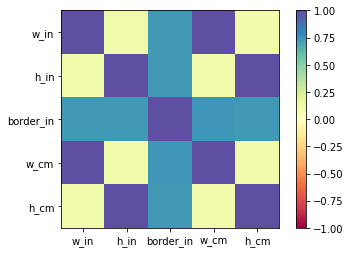

In [23]:
ax = plt.imshow(corr, cmap='Spectral', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)